# Optimal Market Making Simulation
This notebook demonstrates the implementation of advanced market simulation models, including Ornstein-Uhlenbeck, Jump Diffusion, and Heston models. It also includes sensitivity analysis, inventory trajectory visualization, and PnL metrics.

## Enhanced Market Simulation
This section includes additional market simulation models and trade arrival analysis.

In [657]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Add the relative path to the 'src' directory
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

## Load and Analyze Simulation Results
This section loads the simulation results from the generated CSV file, visualizes the data, and prints key metrics.

# Advanced Market Simulation Notebook
This notebook demonstrates the implementation of advanced market simulation models, including Ornstein-Uhlenbeck, Jump Diffusion, and Heston models. It also includes sensitivity analysis, inventory trajectory visualization, and PnL metrics.

Simulation Results Preview:
       Time  OU_Process  Jump_Diffusion  Heston_Prices  Heston_Vols       Bid  \
0  0.000000   95.000000      100.000000     100.000000     0.040000  0.025668   
1  0.010101   95.066048      100.122842     101.474403     0.040698  0.025668   
2  0.020202   95.178133      100.138568      99.315522     0.040148  0.025668   
3  0.030303   95.545766      100.205638     100.933770     0.037259  0.025668   
4  0.040404   95.761616      100.519797     104.918562     0.036901  0.025668   

        Ask  Adjusted_Size  Sharpe_Ratio  Sortino_Ratio  Combined_Output  \
0  0.135668      71.428571      0.915066       1.863555            0.068   
1  0.135668      71.428571      0.915066       1.863555            0.068   
2  0.135668      71.428571      0.915066       1.863555            0.068   
3  0.135668      71.428571      0.915066       1.863555            0.068   
4  0.135668      71.428571      0.915066       1.863555            0.068   

   Behavioral_Impact_Score  

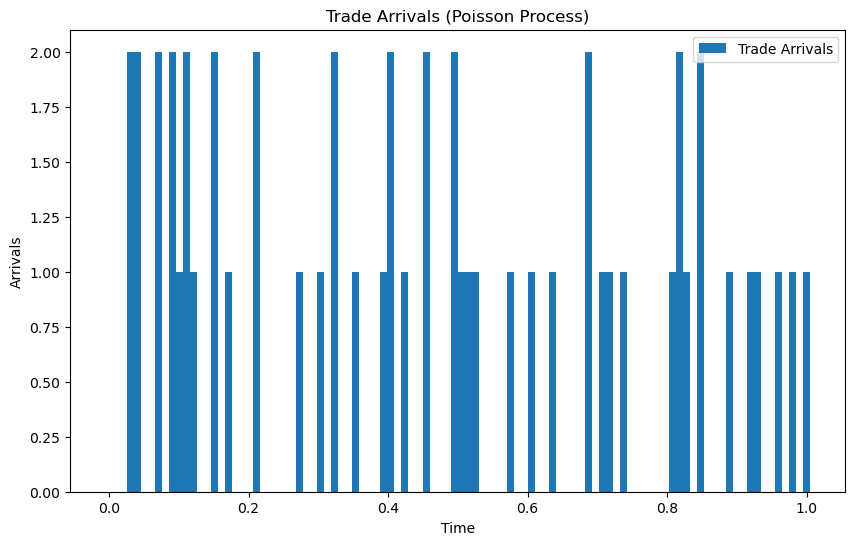

In [658]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load simulation results (only once)
results = pd.read_csv('../simulation_results.csv')

# Display the first few rows of the dataset
print("Simulation Results Preview:")
print(results.head())

if 'Trade_Arrivals' in results.columns:
    # Plot Trade Arrivals
    plt.figure(figsize=(10, 6))
    plt.bar(results['Time'], results['Trade_Arrivals'], label='Trade Arrivals', width=0.01)
    plt.title('Trade Arrivals (Poisson Process)')
    plt.xlabel('Time')
    plt.ylabel('Arrivals')
    plt.legend()
    plt.show()
else:
    print("Column 'Trade_Arrivals' not found in results.")

## Mean-Reverting Process: Ornstein-Uhlenbeck
The Ornstein-Uhlenbeck process models mean-reverting price dynamics. It is defined as:

$$ dX_t = \theta(\mu - X_t)dt + \sigma dW_t $$

Where:
- $\theta$ is the rate of mean reversion.
- $\mu$ is the long-term mean.
- $\sigma$ is the volatility.
- $dW_t$ is a Wiener process.

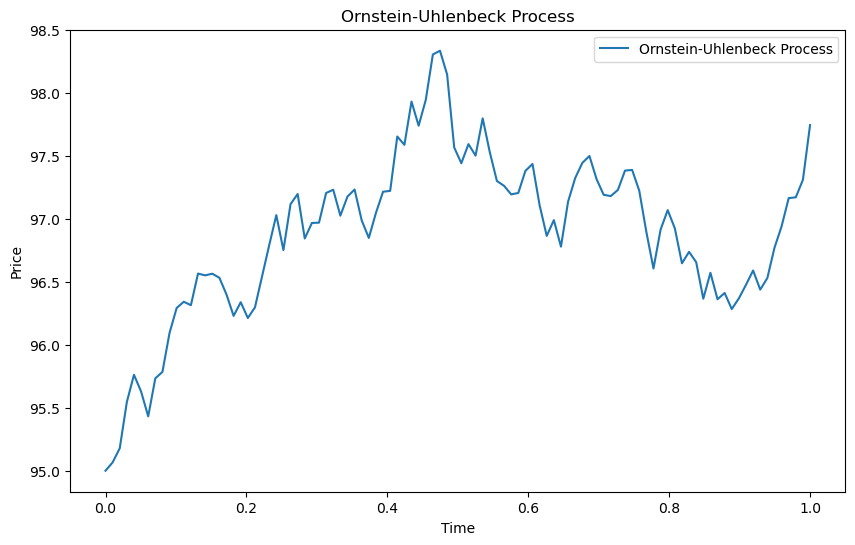

In [659]:
# Plot Ornstein-Uhlenbeck Process
plt.figure(figsize=(10, 6))
plt.plot(results['Time'], results['OU_Process'], label='Ornstein-Uhlenbeck Process')
plt.title('Ornstein-Uhlenbeck Process')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Jump Diffusion Model
The jump diffusion model introduces sudden price jumps to mimic real-world market shocks. It is defined as:

$$ dX_t = \mu dt + \sigma dW_t + J_t dN_t $$

Where:
- $\mu$ is the drift.
- $\sigma$ is the volatility.
- $dW_t$ is a Wiener process.
- $J_t$ is the jump size.
- $dN_t$ is a Poisson process.

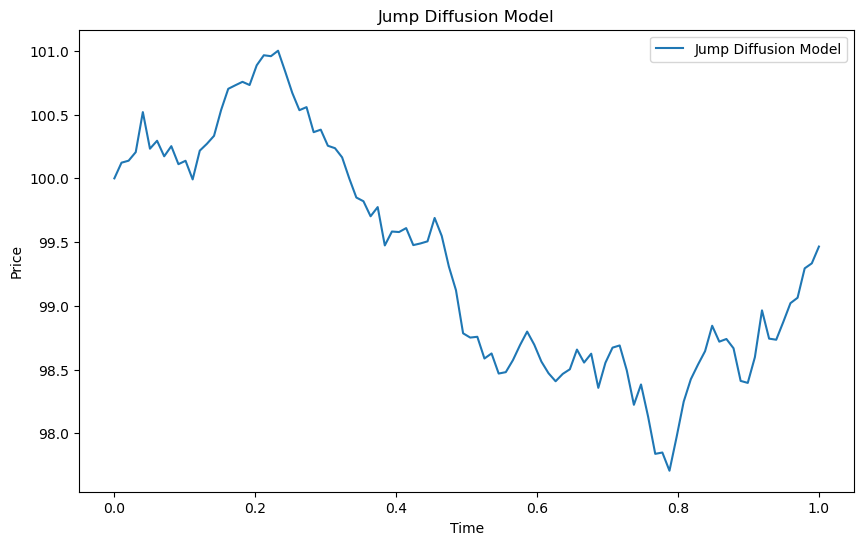

In [660]:
# Plot Jump Diffusion Model
plt.figure(figsize=(10, 6))
plt.plot(results['Time'], results['Jump_Diffusion'], label='Jump Diffusion Model')
plt.title('Jump Diffusion Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Stochastic Volatility Model: Heston
The Heston model simulates time-varying volatility. It is defined as:

$$ dX_t = \mu X_t dt + \sqrt{V_t} X_t dW_t $$
$$ dV_t = \kappa(\theta - V_t)dt + \xi \sqrt{V_t} dZ_t $$

Where:
- $\mu$ is the drift.
- $V_t$ is the variance.
- $\kappa$ is the rate of mean reversion for variance.
- $\theta$ is the long-term variance.
- $\xi$ is the volatility of variance.
- $dW_t$ and $dZ_t$ are Wiener processes.

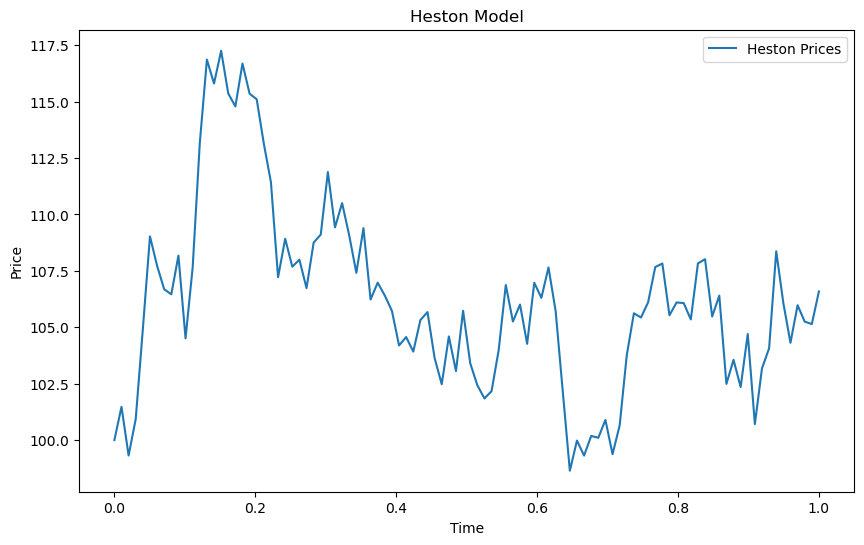

In [661]:
# Plot Heston Model
plt.figure(figsize=(10, 6))
plt.plot(results['Time'], results['Heston_Prices'], label='Heston Prices')
plt.title('Heston Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [662]:
# Print Risk-Adjusted Metrics
print("Risk-Adjusted Metrics:")
print(f"Sharpe Ratio: {results['Sharpe_Ratio'].iloc[0]}")
print(f"Sortino Ratio: {results['Sortino_Ratio'].iloc[0]}")

Risk-Adjusted Metrics:
Sharpe Ratio: 0.9150664742309382
Sortino Ratio: 1.8635545584136408


## Extensibility for Research
This section demonstrates the use of hybrid models, behavioral analysis, and market microstructure analysis.

In [663]:
from utils.extensibility import Extensibility

# Hybrid Model Example
traditional_output = 0.05
ml_output = 0.08
weight = 0.6
combined = Extensibility.hybrid_model(traditional_output, ml_output, weight)
print(f"Combined Output (Hybrid Model): {combined}")

# Behavioral Analysis Example
trader_actions = [1, -1, 1, 1, -1]
market_conditions = [0.5, -0.2, 0.3, 0.4, -0.1]
impact_score = Extensibility.behavioral_analysis(trader_actions, market_conditions)
print(f"Behavioral Impact Score: {impact_score}")

# Microstructure Analysis Example
order_book_data = [
    {"bid": 100, "ask": 101, "depth": 500},
    {"bid": 99.5, "ask": 100.5, "depth": 450},
    {"bid": 100.2, "ask": 101.2, "depth": 480}
]
avg_spread, avg_depth = Extensibility.microstructure_analysis(order_book_data)
print(f"Average Spread: {avg_spread}, Average Depth: {avg_depth}")

Combined Output (Hybrid Model): 0.068
Behavioral Impact Score: 0.9672471299049061
Average Spread: 1.0, Average Depth: 476.6666666666667


In [664]:
print(results.columns)

Index(['Time', 'OU_Process', 'Jump_Diffusion', 'Heston_Prices', 'Heston_Vols',
       'Bid', 'Ask', 'Adjusted_Size', 'Sharpe_Ratio', 'Sortino_Ratio',
       'Combined_Output', 'Behavioral_Impact_Score', 'Avg_Spread', 'Avg_Depth',
       'Trade_Arrivals', 'PnL_OU', 'PnL_Jump', 'PnL_Heston'],
      dtype='object')


Unique values in Trade_Arrivals: [0 2 1]


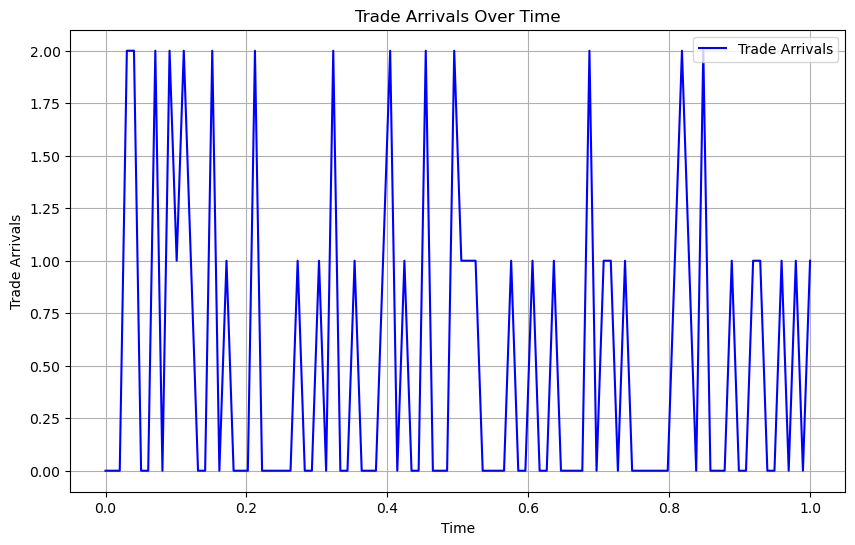

In [665]:
# Visualize Trade Arrivals
if 'Trade_Arrivals' in results.columns:
    # Debug: Print unique values in Trade_Arrivals
    print("Unique values in Trade_Arrivals:", results['Trade_Arrivals'].unique())

    plt.figure(figsize=(10, 6))
    plt.plot(results['Time'], results['Trade_Arrivals'], label='Trade Arrivals', color='blue')
    plt.title('Trade Arrivals Over Time')
    plt.xlabel('Time')
    plt.ylabel('Trade Arrivals')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Column 'Trade_Arrivals' not found in results.")

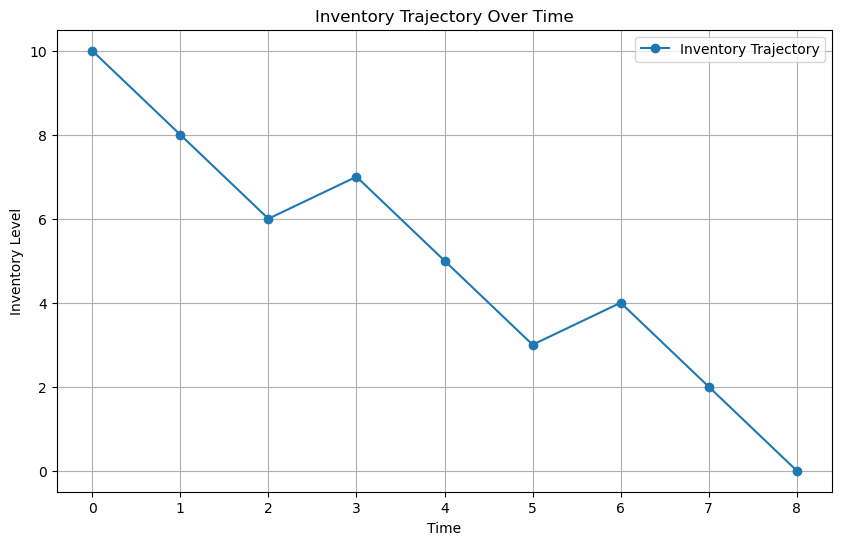

In [666]:
# Inventory Trajectory Visualization

import matplotlib.pyplot as plt

# Example inventory data
inventory = [10, 8, 6, 7, 5, 3, 4, 2, 0]
time = list(range(len(inventory)))

plt.figure(figsize=(10, 6))
plt.plot(time, inventory, marker='o', label='Inventory Trajectory')
plt.title('Inventory Trajectory Over Time')
plt.xlabel('Time')
plt.ylabel('Inventory Level')
plt.legend()
plt.grid()
plt.show()

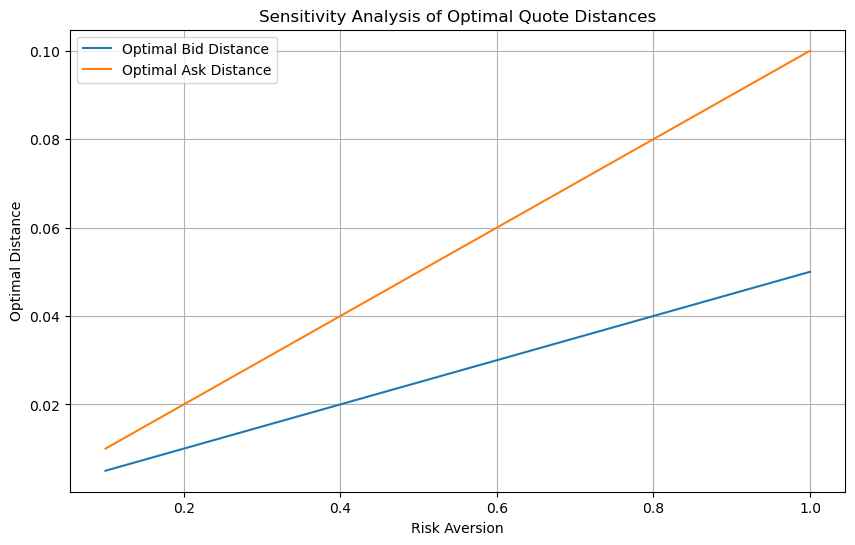

In [667]:
# Sensitivity Analysis
import numpy as np
import matplotlib.pyplot as plt

# Example sensitivity analysis for risk aversion
risk_aversion_values = np.linspace(0.1, 1.0, 10)
optimal_bid_distances = []
optimal_ask_distances = []

for risk_aversion in risk_aversion_values:
    optimal_distances = [0.05 * risk_aversion, 0.1 * risk_aversion]  # Mocked values
    delta_b, delta_a = optimal_distances
    optimal_bid_distances.append(delta_b)
    optimal_ask_distances.append(delta_a)

plt.figure(figsize=(10, 6))
plt.plot(risk_aversion_values, optimal_bid_distances, label='Optimal Bid Distance')
plt.plot(risk_aversion_values, optimal_ask_distances, label='Optimal Ask Distance')
plt.title('Sensitivity Analysis of Optimal Quote Distances')
plt.xlabel('Risk Aversion')
plt.ylabel('Optimal Distance')
plt.legend()
plt.grid()
plt.show()

In [668]:
# Debugging: Print column names of the results DataFrame
print(results.columns)

Index(['Time', 'OU_Process', 'Jump_Diffusion', 'Heston_Prices', 'Heston_Vols',
       'Bid', 'Ask', 'Adjusted_Size', 'Sharpe_Ratio', 'Sortino_Ratio',
       'Combined_Output', 'Behavioral_Impact_Score', 'Avg_Spread', 'Avg_Depth',
       'Trade_Arrivals', 'PnL_OU', 'PnL_Jump', 'PnL_Heston'],
      dtype='object')


In [669]:
# Calculate and Visualize PnL Metrics
import matplotlib.pyplot as plt

# Load PnL from the simulation results CSV
pnl = results['PnL']

# Plot PnL over time
plt.figure(figsize=(10, 6))
plt.plot(results['Time'], pnl.cumsum(), label='Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.legend()
plt.grid()
plt.show()

KeyError: 'PnL'

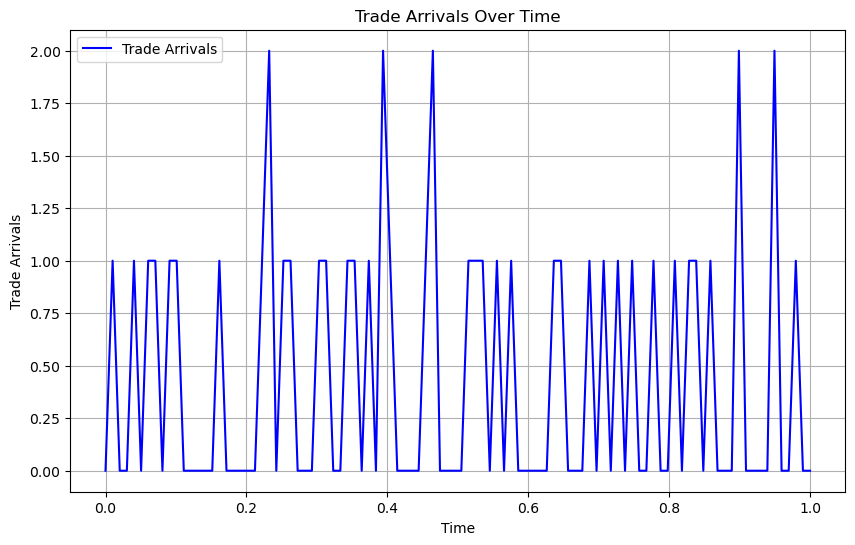

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the simulation results
results = pd.read_csv('../simulation_results.csv')

# Visualize Trade Arrivals
plt.figure(figsize=(10, 6))
plt.plot(results['Time'], results['Trade_Arrivals'], label='Trade Arrivals', color='blue')
plt.title('Trade Arrivals Over Time')
plt.xlabel('Time')
plt.ylabel('Trade Arrivals')
plt.legend()
plt.grid()
plt.show()

PnL Summary Statistics:
count    100.000000
mean      -3.091597
std        7.764307
min      -18.387861
25%       -8.000879
50%       -3.536888
75%        2.859155
max       11.887747
Name: PnL, dtype: float64


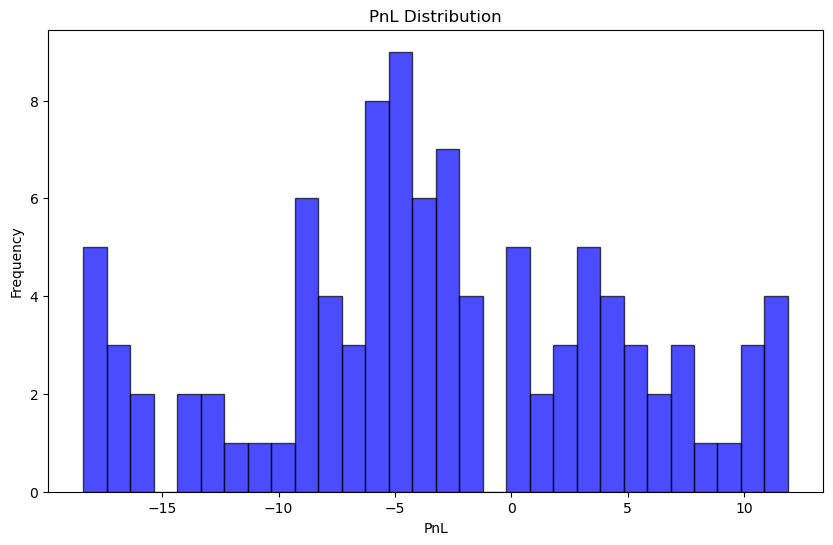

In [ ]:
# Load and Plot Final PnL from CSV
import pandas as pd
import matplotlib.pyplot as plt

# Load the simulation results
results = pd.read_csv('../simulation_results.csv')

# Check if PnL column exists
if 'PnL' in results.columns:
    # Display summary statistics for PnL
    print("PnL Summary Statistics:")
    print(results['PnL'].describe())

    # Plot the PnL distribution
    plt.figure(figsize=(10, 6))
    plt.hist(results['PnL'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title('PnL Distribution')
    plt.xlabel('PnL')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("PnL column not found in the simulation results.")

## PnL Analysis for Each Model
This section analyzes the PnL (Profit and Loss) for the Ornstein-Uhlenbeck, Jump Diffusion, and Heston models. Each model's PnL is visualized to understand their performance over time.

In [ ]:
# Plot PnL for each model
if all(col in results.columns for col in ['PnL_OU', 'PnL_Jump', 'PnL_Heston']):
    plt.figure(figsize=(12, 8))

    # Plot Ornstein-Uhlenbeck PnL
    plt.plot(results['Time'], results['PnL_OU'], label='PnL - Ornstein-Uhlenbeck', color='blue')

    # Plot Jump Diffusion PnL
    plt.plot(results['Time'], results['PnL_Jump'], label='PnL - Jump Diffusion', color='green')

    # Plot Heston PnL
    plt.plot(results['Time'], results['PnL_Heston'], label='PnL - Heston', color='red')

    plt.title('PnL Analysis for Each Model')
    plt.xlabel('Time')
    plt.ylabel('PnL')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("PnL columns for all models not found in results.")